In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import BayesianRidge

In [3]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings(action = 'ignore')

In [4]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot
from sklearn.ensemble import StackingRegressor

In [5]:
data=pd.read_csv('globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1")

In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, consulate)",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,

In [7]:
redundant_columns=[col for col in data.columns if '_txt' in col]

In [8]:
data=data.drop(redundant_columns,axis=1)

In [9]:
print("Number of features before dropping columns with >50%% of NAN: %.1d" % data.shape[1])
columns = data.columns
percent_missing = data.isnull().sum() * 100 / len(data)
#percent_missing
unique = data.nunique()

dtypes = data.dtypes

missing_value_data = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing,
                                 'unique': unique,
                                 'types': dtypes})

missing_value_data = missing_value_data[missing_value_data['percent_missing']>0]
missing_drop = list(missing_value_data[missing_value_data.percent_missing>50].column_name)
data = data.drop(missing_drop, axis=1)
print("Number of features after dropping columns with >50%% of NAN: %.1d" % data.shape[1])
data.head()


Number of features before dropping columns with >50% of NAN: 107
Number of features after dropping columns with >50% of NAN: 50


,eventid,iyear,imonth,iday,extended,country,region,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,corp1,target1,natlty1,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,2,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,14,68.0,NaN,Julio Guzman,58.0,MANO-D,0.0,0,NaN,NaN,NaN,13,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,1,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,7,45.0,Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,5,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,10,54.0,Voice of America,Employee,217.0,Unknown,0.0,0,NaN,NaN,NaN,13,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,8,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,7,46.0,NaN,U.S. Embassy,217.0,Unknown,0.0,0,NaN,NaN,NaN,6,16.0,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,4,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,7,46.0,NaN,U.S. Consulate,217.0,Unknown,0.0,0,NaN,NaN,NaN,8,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1


In [10]:
data = data[(data.crit1 == 1) & (data.crit2 == 1) & (data.crit3 == 1) & (data.doubtterr == 0)]
data.iloc[:,[12, 36,39,42]] = data.iloc[:,[12, 36,39,42]].replace(-9,0)
data.claimed.replace(2,1, inplace = True)
data['ncasualties'] = data['nkill'] + data['nwound']
data=data.drop(['scite1','corp1','target1','summary','weapdetail','nkill','nwound','eventid'],axis=1)

In [11]:
data0=data.dropna(how='any')

In [12]:
fq_provstate=data0.groupby('provstate').size()/len(data0)
data0.loc[:,"{}_freq_encode".format('provstate')]=data0['provstate'].map(fq_provstate)

In [13]:
fq_city=data0.groupby('city').size()/len(data0)
data0.loc[:,"{}_freq_encode".format('city')]=data0['city'].map(fq_city)

In [14]:
fq_gname=data0.groupby('gname').size()/len(data0)
data0.loc[:,"{}_freq_encode".format('gname')]=data0['gname'].map(fq_gname)


In [15]:
enc=OneHotEncoder(handle_unknown='ignore')
enc_df=pd.DataFrame(enc.fit_transform(data0[['dbsource']]).toarray())


In [16]:
enc_df1=enc_df.reset_index().drop(['index'],axis=1)

In [17]:
data1=data0.reset_index().drop(['index'],axis=1)

In [18]:
for i in enc_df1.columns:
    column=enc_df1.columns[i]
    #print(column)
    data1[column]=enc_df1[column]

In [19]:
data2=data1.drop(['dbsource','gname','city','provstate'],axis=1)

In [20]:
X=data2.drop(['ncasualties'],axis=1)
y=data2['ncasualties']

In [21]:
y1=np.log(y+1)

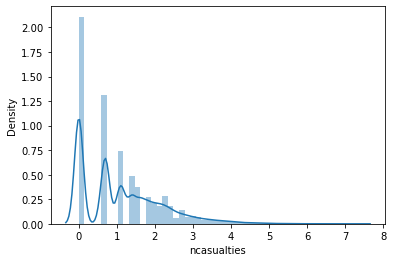

In [22]:
ax = sns.distplot(y1)

In [23]:
Q1 = y1.quantile(0.25)
Q3 = y1.quantile(0.75)
IQR = Q3 - Q1
print([Q1, Q3])
filter=(y1>=Q1-1.5*IQR)  & (y1<=Q3+1.5*IQR)
y2=y1[filter]
X2=X[filter]

[0.0, 1.791759469228055]


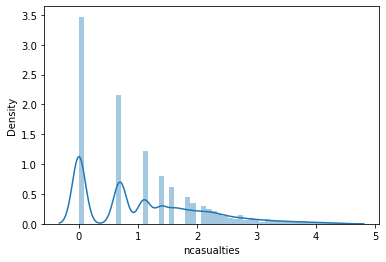

In [24]:
ax = sns.distplot(y2)

In [30]:
xgb = XGBRegressor()
xgb.fit(X2,y2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
xgb_importances=pd.DataFrame(data={'Attribute':X2.columns,'Importance':xgb.feature_importances_})
xgb_importances=xgb_importances.sort_values(by='Importance')

Text(0.5, 0, 'Relative Importance')

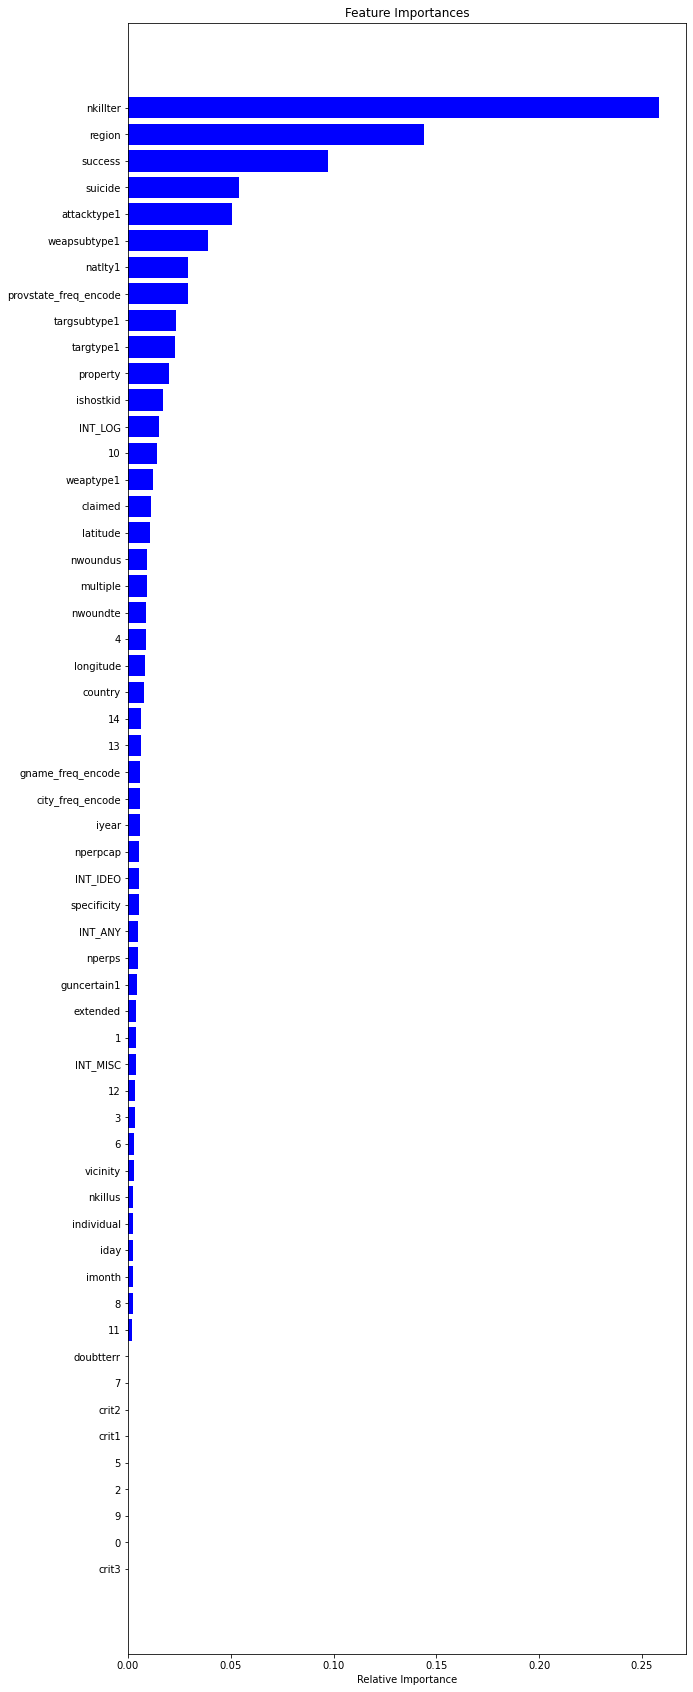

In [28]:
features=X2.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)
fig=plt.figure(figsize=(10,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

#### Evaluate models

In [32]:
scaler=RobustScaler()
x_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(x_scaled)

In [33]:
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['DT'] = DecisionTreeRegressor()
    models['RR'] = RandomForestRegressor()
    models['XGB'] = XGBRegressor()
    models['BR'] = BayesianRidge()
    return models

In [34]:
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [35]:
models = get_models()

>knn -4.899 (0.058)
>DT -5.561 (0.126)
>RR -4.492 (0.094)
>XGB -4.746 (0.105)
>BR -5.671 (0.051)


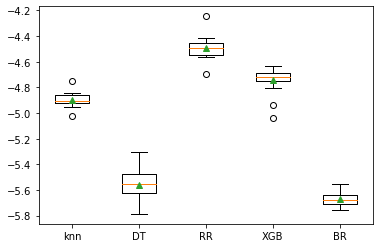

In [36]:
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_scaled, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

In [39]:
scaler=RobustScaler()
x_scaled=scaler.fit_transform(X)
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
X_scaled=pd.DataFrame(x_scaled)
X_train=pd.DataFrame(x_train_scaled)
X_test=pd.DataFrame(x_test_scaled)

In [41]:
rrr=RandomForestRegressor()
rrr.fit(X_train,y_train)

RandomForestRegressor()

In [43]:
y_pred=rrr.predict(X_test)

In [44]:
MSE = mse(y_pred, y_test)
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, y_pred)
print("RMSE: ", np.round(RMSE, 2))
print("R-Squared: ", np.round(R_squared, 2))

RMSE:  0.63
R-Squared:  0.6


#### Stacking model 1(KNN, DT, EN)

In [52]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('EN', ElasticNet()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [53]:
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['EN'] = ElasticNet()
    models['stacking'] = get_stacking()
    return models

In [54]:
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [55]:
models = get_models()

>knn -4.864 (0.141)
>cart -5.563 (0.262)
>EN -6.007 (0.141)
>stacking -4.975 (0.124)


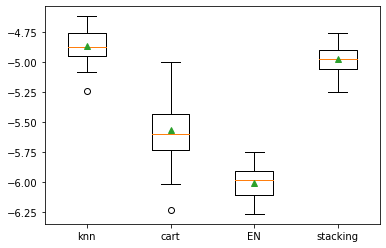

In [56]:
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_scaled, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Stacking model 2 (KNN, DT, SVR)

In [100]:
def get_stacking2():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('SVR', SVR()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [101]:
def get_models2():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['SVR'] = SVR()
    models['stacking'] = get_stacking2()
    return models

In [102]:
def evaluate_model2(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [103]:
models2 = get_models2()

In [105]:
results2, names2 = list(), list()
for name2, model2 in models2.items():
    scores2 = evaluate_model2(model2, X_scaled, y)
    results2.append(scores2)
    names2.append(name2)
    print('>%s %.3f (%.3f)' % (name2, mean(scores2), std(scores2)))
# plot model performance for comparison
pyplot.boxplot(results2, labels=names2, showmeans=True)
pyplot.show()

>knn -4.864 (0.141)
>cart -5.553 (0.231)


KeyboardInterrupt: 

#### Fit top 10 features into model

In [29]:
X10=X2[features[indices][-10:]]

In [31]:
x10_train, x10_test, y10_train, y10_test = train_test_split(X10, y2, test_size=0.2)

In [34]:
scaler10=RobustScaler()
x10_scaled=scaler10.fit_transform(X10)
x10_train_scaled=scaler10.fit_transform(x10_train)
x10_test_scaled=scaler10.transform(x10_test)
X10_scaled=pd.DataFrame(x10_scaled)
X10_train=pd.DataFrame(x10_train_scaled)
X10_test=pd.DataFrame(x10_test_scaled)

In [ ]:
models = get_models()

In [ ]:
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_scaled, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [84]:
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('EN', ElasticNet()))
level1 = LinearRegression()

In [85]:
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

In [86]:
model.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('knn', KNeighborsRegressor()),
                              ('cart', DecisionTreeRegressor()),
                              ('EN', ElasticNet())],
                  final_estimator=LinearRegression())

In [87]:
y_pred=model.predict(X_test)

In [88]:
MSE = mse(y_pred, y_test)
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, y_pred)
print("RMSE: ", np.round(RMSE, 2))
print("R-Squared: ", np.round(R_squared, 2))

RMSE:  0.71
R-Squared:  0.51


#### Fit top 20 Features into the model

In [114]:
X20=X2[features[indices][-20:]]

In [92]:
x20_train, x20_test, y20_train, y20_test = train_test_split(X20, y2, test_size=0.2)

In [93]:
scaler20=RobustScaler()
x20_scaled=scaler20.fit_transform(X20)
x20_train_scaled=scaler20.fit_transform(x20_train)
x20_test_scaled=scaler20.transform(x20_test)
X20_scaled=pd.DataFrame(x20_scaled)
X20_train=pd.DataFrame(x20_train_scaled)
X20_test=pd.DataFrame(x20_test_scaled)

In [95]:
model20 = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

In [97]:
model20.fit(X20_train, y20_train)


StackingRegressor(cv=5,
                  estimators=[('knn', KNeighborsRegressor()),
                              ('cart', DecisionTreeRegressor()),
                              ('EN', ElasticNet())],
                  final_estimator=LinearRegression())

In [102]:
y20_pred=model20.predict(X20_test)

In [103]:
MSE20 = mse(y20_pred, y20_test)
RMSE20 = np.sqrt(MSE)
R_squared20 = r2_score(y20_test, y20_pred)
print("RMSE: ", np.round(RMSE20, 2))
print("R-Squared: ", np.round(R_squared20, 2))

RMSE:  0.71
R-Squared:  0.52


In [129]:
X20['ncasualties']=y2

<AxesSubplot:>

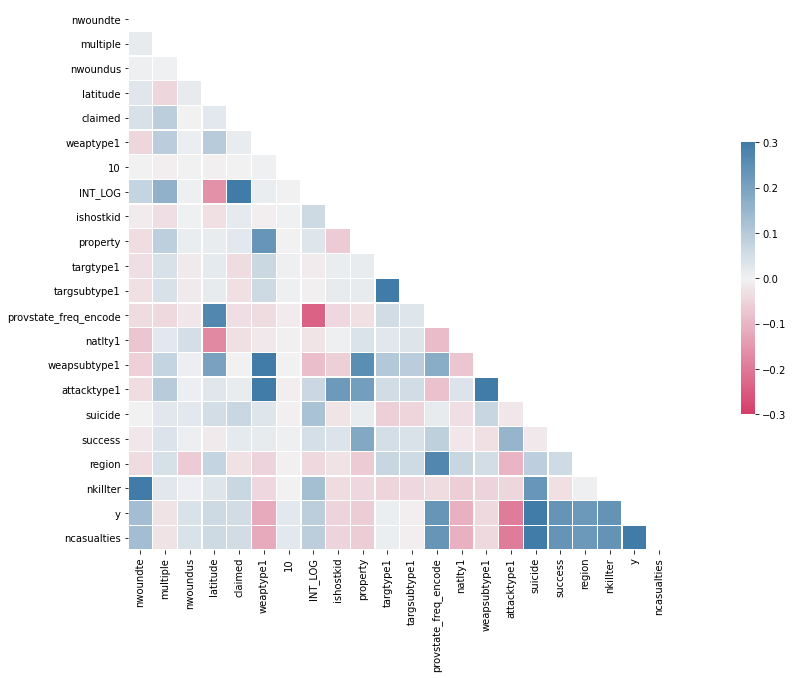

In [130]:
corr_matrix = X20.corr()
mask = np.zeros_like(corr_matrix, dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(25,10))
cmap = sns.diverging_palette(0,240, as_cmap = True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin = -0.3, vmax=0.3, center=0, square=True, linewidths=.3, cbar_kws={"shrink": .5})


#### Fit top 30 features into model

In [106]:
X30=X2[features[indices][-30:]]

In [108]:
x30_train, x30_test, y30_train, y30_test = train_test_split(X30, y2, test_size=0.2)

In [109]:
scaler30=RobustScaler()
x30_scaled=scaler30.fit_transform(X30)
x30_train_scaled=scaler30.fit_transform(x30_train)
x30_test_scaled=scaler30.transform(x30_test)
X30_scaled=pd.DataFrame(x30_scaled)
X30_train=pd.DataFrame(x30_train_scaled)
X30_test=pd.DataFrame(x30_test_scaled)

In [110]:
model30 = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

In [111]:
model30.fit(X30_train, y30_train)

StackingRegressor(cv=5,
                  estimators=[('knn', KNeighborsRegressor()),
                              ('cart', DecisionTreeRegressor()),
                              ('EN', ElasticNet())],
                  final_estimator=LinearRegression())

In [112]:
y30_pred=model30.predict(X30_test)

In [113]:
MSE30 = mse(y30_pred, y30_test)
RMSE30 = np.sqrt(MSE)
R_squared30 = r2_score(y30_test, y30_pred)
print("RMSE: ", np.round(RMSE30, 2))
print("R-Squared: ", np.round(R_squared30, 2))

RMSE:  0.71
R-Squared:  0.52
